In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify

In [56]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [58]:
# View all of the classes that automap found
#for mappedclass in Base.classes:
    #print (mappedclass)
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the data set.
recentdate=session.query(func.max(measurement.date)).first()
recentdate

('2017-08-23',)

<AxesSubplot:xlabel='date'>

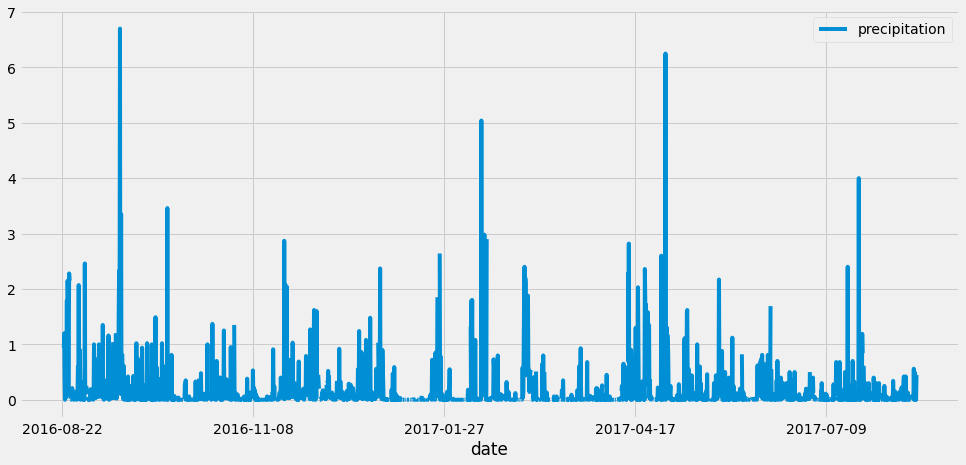

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_minus_1= dt.date(2017, 8, 23) - dt.date(2000, 8, 23)+ dt.date(1999, 8, 23)
year_minus_1
# Perform a query to retrieve the data and precipitation scores
retrieve = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_minus_1).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(retrieve, columns=['date', 'precipitation'])

# Sort the dataframe by date
sortdf = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

x= 'date'
y= 'precipitation'
sortdf.plot(x, y, figsize = (15, 7))



In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [88]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
topactive= 'USC00519281'
topactivetemp=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == topactive).all()
print(f"Lowest Temperature: {topactivetemp[0][0]} Fahrenheit")
print(f"Fahrenheit, Highest Temperature: {topactivetemp[0][1]} Fahrenheit")
print(f"Fahrenheit, Average Temperature: {round(topactivetemp[0][2], 2)} Fahrenheit")

Lowest Temperature: 54.0 Fahrenheit
Fahrenheit, Highest Temperature: 85.0 Fahrenheit
Fahrenheit, Average Temperature: 71.66 Fahrenheit


<AxesSubplot:ylabel='Frequency'>

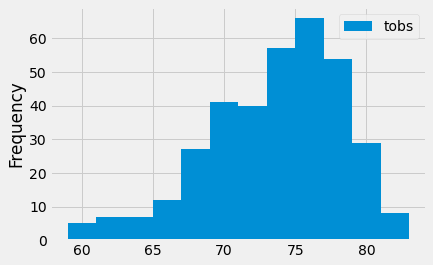

In [96]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= year_minus_1).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)

# Close session

In [97]:
# Close Session
session.close()